<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install-U accelerate
!pip install -U transformers

ERROR: unknown command "install-U" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [3]:
import pandas as pd
df=pd.read_csv('/content/IMDB-Movie-Data.csv',usecols=["Description","Genre"])

In [4]:
df.head()

,Genre,Description
0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [5]:
df.shape

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        1000 non-null   object
 1   Description  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [7]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

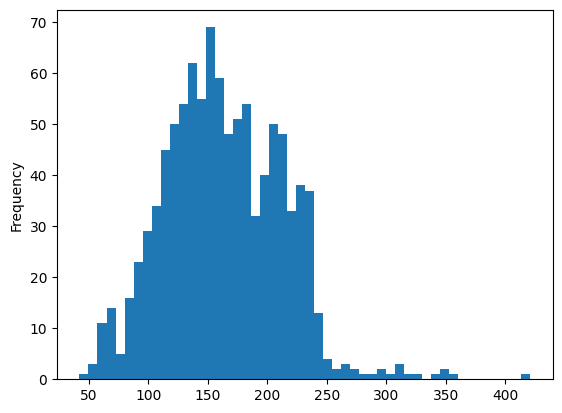

In [8]:
df['Description'].str.len().plot.hist(bins=50)

In [9]:
# Split the genres into lists
df['Genre']=df['Genre'].astype(str)
df['Genre'] = df['Genre'].str.split(',')
genre_counts=[g for genre in df['Genre'] for g in genre]
genre_counts

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [10]:
pd.Series(genre_counts).value_counts()

,count
Drama,513
Action,303
Comedy,279
Adventure,259
Thriller,195
Crime,150
Romance,141
Sci-Fi,120
Horror,119
Mystery,106


Label Encoder

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

In [12]:
multilabel=MultiLabelBinarizer()

In [13]:
labels=multilabel.fit_transform(df['Genre']).astype('float32')
texts=df['Description'].tolist()

In [14]:
labels

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
texts[:5]

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.']

In [16]:
import torch
from transformers import DistilBertTokenizer,AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [17]:
train_texts,val_texts,train_labels,val_labels=train_test_split(texts,labels,test_size=0.2,random_state=42)

In [18]:
checkpoint='distilbert-base-uncased'

In [19]:
tokenizer=DistilBertTokenizer.from_pretrained(checkpoint)
model=DistilBertForSequenceClassification.from_pretrained(checkpoint,num_labels=len(labels[0]),problem_type="multi_label_classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
#Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self,texts,labels,tokenizer,max_len=128):
    self.texts=texts
    self.labels=labels
    self.tokenizer=tokenizer
    self.max_len=max_len

  def __len__(self):
    return len(self.texts)
  def __getitem__(self,idx):
    text=str(self.texts[idx])
    label=torch.tensor(self.labels[idx])

    encoding=self.tokenizer(text,truncation=True,padding='max_length',max_length=self.max_len,return_tensors='pt')

    return {
        'input_ids':encoding['input_ids'].flatten(),
        'attention_mask':encoding['attention_mask'].flatten(),
        'labels':label
    }

In [21]:
train_dataset=CustomDataset(train_texts,train_labels,tokenizer)
val_dataset=CustomDataset(val_texts,val_labels,tokenizer)

In [22]:
train_dataset

In [23]:
# val_dataset[0]

In [24]:
#multi label classification evaluation metrics
import numpy as np
from sklearn.metrics import roc_auc_score,f1_score,hamming_loss
from transformers import EvalPrediction
import torch

def multi_label_metrics(predictions,labels,threshold=0.3):
  sigmoid=torch.nn.Sigmoid()
  probs=sigmoid(torch.Tensor(predictions))
  y_pred=np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)]=1
  y_true=labels

  f1=f1_score(y_true,y_pred,average='macro')
  roc_auc=roc_auc_score(y_true,y_pred,average='macro')
  hamming=hamming_loss(y_true,y_pred)
  metrics={
      'roc_auc':roc_auc,
      'hamming_loss':hamming,
      "f1":f1
  }
  return metrics

def compute_metrics(p:EvalPrediction):
  preds=p.predictions[0] if isinstance(p.predictions,tuple) else p.predictions

  result=multi_label_metrics(predictions=preds,labels=p.label_ids)

  return result

In [25]:
#training arguments
from transformers import TrainingArguments,Trainer
args=TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir="./results",
    num_train_epochs=3,
    evaluation_strategy="epoch",
    save_steps=1000,
    save_total_limit=2
)

trainer=Trainer(model=model,args=args,train_dataset=train_dataset,eval_dataset=val_dataset,compute_metrics=compute_metrics)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
trainer.train()

Epoch,Training Loss,Validation Loss,Roc Auc,Hamming Loss,F1,Runtime,Samples Per Second,Steps Per Second
1,No log,0.305442,0.537486,0.124500,0.143413,0.988100,202.413000,25.302000
2,No log,0.275701,0.588639,0.116500,0.228985,0.960800,208.162000,26.020000
3,No log,0.265480,0.597130,0.113750,0.234676,1.127100,177.454000,22.182000


TrainOutput(global_step=300, training_loss=0.3025592041015625, metrics={'train_runtime': 40.2557, 'train_samples_per_second': 59.619, 'train_steps_per_second': 7.452, 'total_flos': 79505952768000.0, 'train_loss': 0.3025592041015625, 'epoch': 3.0})

In [27]:
trainer.evaluate()

{'eval_loss': 0.2654796838760376,
 'eval_roc_auc': 0.5971304835525604,
 'eval_hamming_loss': 0.11375,
 'eval_f1': 0.23467641461848862,
 'eval_runtime': 1.146,
 'eval_samples_per_second': 174.521,
 'eval_steps_per_second': 21.815,
 'epoch': 3.0}

In [28]:
trainer.save_model("distilbert-finetuned-imdb-multi-label")

In [29]:
import pickle
with open('multi-label-binarizer.pkl','wb') as f:
  pickle.dump(multilabel,f)

In [30]:
!zip -r distilbert.zip "/content/distilbert-finetuned-imdb-multi-label"

  adding: content/distilbert-finetuned-imdb-multi-label/ (stored 0%)
  adding: content/distilbert-finetuned-imdb-multi-label/config.json (deflated 62%)
  adding: content/distilbert-finetuned-imdb-multi-label/training_args.bin (deflated 51%)
  adding: content/distilbert-finetuned-imdb-multi-label/model.safetensors (deflated 8%)


In [31]:
#Predictions

In [32]:
text_data="After his home is conquered by the tyrannical emperors who now lead Rome, Lucius is forced to enter the Colosseum and must look to his past to find strength to return the glory of Rome to its people."

encoding=tokenizer(text_data,return_tensors='pt')

encoding.to(trainer.model.device)

outputs=trainer.model(**encoding)


In [33]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.7609,  0.8113, -2.1885, -2.6702, -1.5951, -2.4563, -0.8725, -2.3617,
         -1.4843, -3.3453, -2.1924, -3.3449, -3.6759, -2.7097, -2.5294, -0.6945,
         -3.7071, -2.0480, -3.7257, -3.7155]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [37]:
sigmoid=torch.nn.Sigmoid()
probs=sigmoid(outputs.logits[0].cpu())
preds=np.zeros(probs.shape)
preds[np.where(probs>=0.3)]=1

preds=preds = preds.reshape(-1, len(multilabel.classes_))


In [38]:
multilabel.inverse_transform(preds)

[('Action', 'Adventure', 'Sci-Fi')]